In [2]:
from Ownkey import API_Key
import requests
import pandas as pd

print(API_Key)

In [3]:
def fetch_crypto_data(API_Key, tickers, multiplier=1, timespan="day", start_date="2024-01-09", end_date="2024-12-10"):
    # Initialize an empty list to collect data
    crypto_data = []
    
    # Loop through each ticker
    for ticker in tickers:
        url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/{multiplier}/{timespan}/{start_date}/{end_date}?apiKey={API_Key}"
        response = requests.get(url)
        data = response.json()
        
        if "results" in data:
            # Create a DataFrame from the results
            df = pd.DataFrame(data["results"])
            df['t'] = pd.to_datetime(df['t'], unit='ms')  # Convert timestamp to datetime
            df.rename(columns={'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, inplace=True)
            
            # Add the Ticker column to identify the cryptocurrency
            df["Ticker"] = ticker
            df.rename(columns={'t': 'Date'}, inplace=True)
            
            # Append the processed DataFrame to the list
            crypto_data.append(df)
        else:
            print(f"Error fetching data for {ticker}: {data}")
    
    # Combine all data into a single DataFrame
    final_df = pd.concat(crypto_data, ignore_index=True)
    
    return final_df


# Example usage
tickers = ["X:BTCUSD", "X:ETHUSD", "X:LTCUSD", "X:DOGEUSD"]  # Add more tickers here

df = fetch_crypto_data(API_Key, tickers)
print(df)

            Volume          vw          Open        Close          High  \
0     3.852435e+04  46491.2035  46989.500000  46124.08000  47988.000000   
1     4.977336e+04  45878.5148  46120.790000  46666.11000  47732.500000   
2     5.094465e+04  46947.4415  46654.000000  46350.40000  49102.290000   
3     5.997095e+04  44196.8707  46350.400000  42773.03000  46522.200000   
4     1.373762e+04  42831.5723  42775.100000  42839.33000  43250.000000   
...            ...         ...           ...          ...           ...   
1343  7.270837e+08      0.4331      0.427610      0.43540      0.442300   
1344  8.572616e+08      0.4525      0.435417      0.45327      0.466680   
1345  8.361394e+08      0.4646      0.453270      0.46687      0.485086   
1346  1.693641e+07      0.4242      0.466760      0.41516      0.467900   
1347  1.344115e+09      0.3934      0.414010      0.39395      0.423030   

              Low       Date       n     Ticker  
0     44500.00000 2024-01-09  656435   X:BTCUSD  

In [5]:
df["Growth Rate"] = ((df["Close"] - df["Open"]) / df["Open"]) * 100

In [6]:
df.head()

,Volume,vw,Open,Close,High,Low,Date,n,Ticker,Growth Rate
0,38524.350057,46491.2035,46989.50,46124.08,47988.00,44500.00,2024-01-09,656435,X:BTCUSD,-1.841731
1,49773.358263,45878.5148,46120.79,46666.11,47732.50,44268.00,2024-01-10,738646,X:BTCUSD,1.182374
2,50944.645338,46947.4415,46654.00,46350.40,49102.29,45555.55,2024-01-11,762583,X:BTCUSD,-0.650748
3,59970.952736,44196.8707,46350.40,42773.03,46522.20,41444.97,2024-01-12,791172,X:BTCUSD,-7.718100
4,13737.624864,42831.5723,42775.10,42839.33,43250.00,42427.00,2024-01-13,315568,X:BTCUSD,0.150157


In [7]:
average_growth = df.groupby("Ticker")["Growth Rate"].mean()

In [8]:
average_growth.max

<bound method Series.max of Ticker
X:BTCUSD     0.229141
X:DOGEUSD    0.596971
X:ETHUSD     0.203740
X:LTCUSD     0.252034
Name: Growth Rate, dtype: float64>

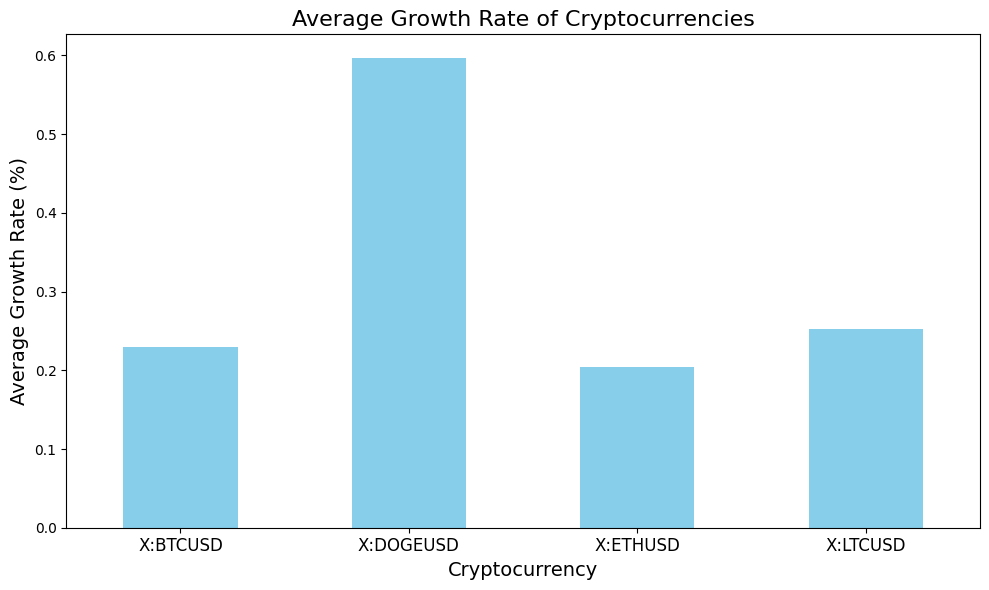

In [9]:
import matplotlib.pyplot as plt

# average growth rate as a bar chart
plt.figure(figsize=(10, 6))
average_growth.plot(kind="bar", color="skyblue")
plt.title("Average Growth Rate of Cryptocurrencies", fontsize=16)
plt.xlabel("Cryptocurrency", fontsize=14)
plt.ylabel("Average Growth Rate (%)", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()